# Inaugural Project

Imports and set magics:

In [132]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from exchangeeconomy import ExchangeEconomyClass
model = ExchangeEconomyClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

To illustrate the Pareto improvements (relative to the endowment) of the exchange economy under consideration, we initially create a class describing the utility and demand functions of the exchange economy (for further explanation see the file exchangeeconomy.py). Using the functions from ExchangeEconomyClass and a simple for loop we can plot the set C in the Edgeworth box.

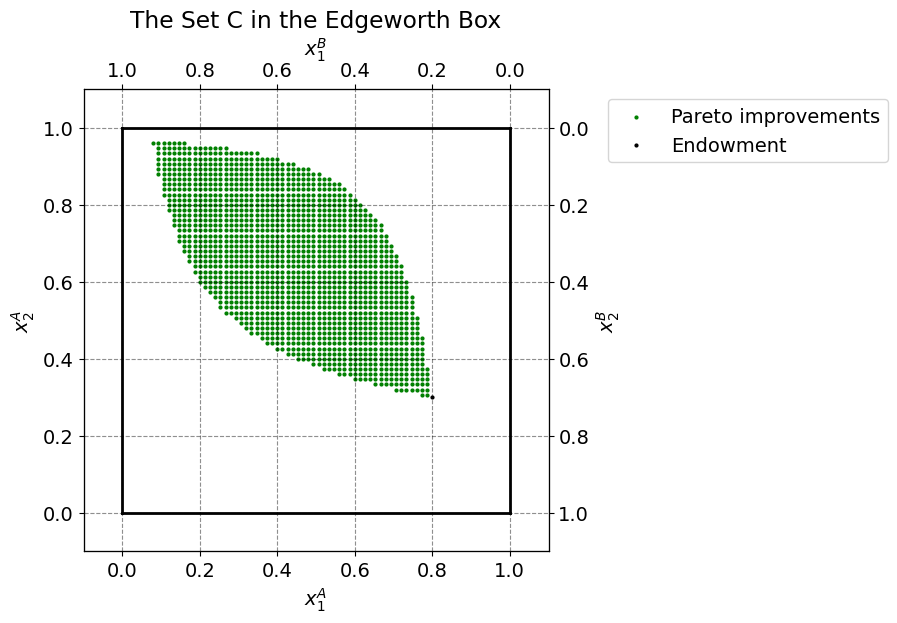

In [133]:
# From the definition of the set C we know that x1A and x2A are elements in the set {0, 1/N, 2/N, ..., 1} where
N = 75

# We then define two arrays of N + 1 evenly spaced numbers between 0 and 1 that constitute the set of x1A and x2A
x1A_array = np.linspace(0, 1, N + 1)
x2A_array = np.linspace(0, 1, N + 1)

# Two empty lists are created to store the values of x1A and x2a that satisfy the conditions of the set C
x1A_list = []
x2A_list = []  

par = model.par # (Gives access to parameters from ExchangeEconomyClass)

# Every combination of x1A, x2A, x1B, x2B in the arrays are tested against the conditions of C and are appended to the lists if satisfied
for x1A in x1A_array:
    for x2A in x2A_array:
        x1B = 1 - x1A
        x2B = 1 - x2A 
       
        if model.utility_A(x1A, x2A) >= model.utility_A(par.w1A, par.w2A) and \
           model.utility_B(x1B, x2B) >= model.utility_B(par.w1B, par.w2B):
            x1A_list.append(x1A)
            x2A_list.append(x2A)

# Now we can plot the combinations of (x1A, x2a) that make up the set C
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Points
ax_A.scatter(x1A_list,x2A_list,s=4,marker='o',color='green',label='Pareto improvements')
ax_A.scatter(par.w1A,par.w2A,s=4,marker='o',color='black',label='Endowment')

# Limits
w1bar = 1.0
w2bar = 1.0
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.75,1.0))
plt.title('The Set C in the Edgeworth Box');

# Question 2 and 3

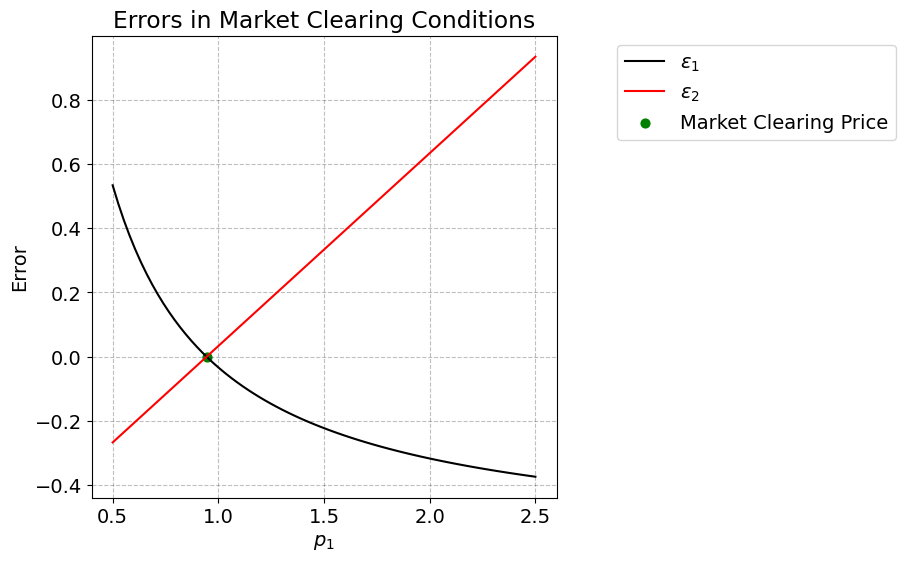

The market clearing price p₁ is thus 0.944


In [134]:
# We define an array of N + 1 evenly spaced numbers between 0.5 and 2.5 that constitute the set of p1
p1_array = np.linspace(0.5, 2.5, N + 1)

# Using the function check_market_clearing from ExchangeEconomyClass we calculate the error in the market clearing conditions
errors = model.check_market_clearing(p1_array)

# The intersection between the lines is calculated by finding the p1 that results in one of the conditions being equal to 0 
# i.e. the argument minimizing the absolute value of an approx. continuous version of the condition. 
# This is also equal to the market clearing price
p1_cont = np.linspace(0.5, 2.5, 10000) # approx. continuous p1
errors_cont = model.check_market_clearing(p1_cont)
intersection = p1_cont[np.argmin(abs(errors_cont[0]))] #returning the value of p1 from the index which is minimizing

# We can now plot the errors and the market clearing price
plt.figure(figsize=(6, 6))
plt.plot(p1_array, errors[0], color='black', label='$\epsilon_1$',)
plt.plot(p1_array, errors[1], color='red', label='$\epsilon_2$',)
plt.scatter(intersection, 0, s=40, marker='o', color='green', label='Market Clearing Price')
plt.xlabel('$p_1$')
plt.ylabel('Error')
plt.title('Errors in Market Clearing Conditions')
plt.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.75,1.0))
plt.grid(True)
plt.show()

print('The market clearing price p\N{subscript one} is thus', round(intersection,3))

# Question 4a

In [135]:
# The demand function of consumer A is modified to be conditional of the demand of consumer B
def demand_A_mod(p1):
        # Modified demand function of consumer A
        x1B_star = par.beta * (p1 * par.w1B + par.p2 * par.w2B) / p1
        x2B_star = (1 - par.beta) * (p1 * par.w1B + par.p2 * par.w2B) / par.p2
        return 1 - x1B_star, 1 - x2B_star

# Every uA using p1's from the set P1 is calculated
uA = model.utility_A(demand_A_mod(p1_array)[0],demand_A_mod(p1_array)[1])

# 'Nan' values are replaced with zeroes
uA[np.isnan(uA)] = 0

# The index of the maximum uA is defined
uA_max = np.argmax(uA)

# Using the index of the maximized utility we can obtain the optimal allocation
print('Optimal allocation for A:')
print('')

print('x1A =',round(demand_A_mod(p1_array)[0][uA_max],3),',','x2A =', round(demand_A_mod(p1_array)[1][uA_max],3))

print('uA =',round(uA[uA_max],3))

print('p1 =', round(p1_array[uA_max],3))

Optimal allocation for A:

x1A = 0.619 , x2A = 0.641
uA = 0.634
p1 = 1.887


# Question 4b

In [136]:
# The utility function we want to maximize is defined
def utility_A_mod(p1):
    # Calculate utility for consumer A given price p1
    utility = model.utility_A(demand_A_mod(p1)[0],demand_A_mod(p1)[1])
    # Negative sign because we are minimizing, but we want to maximize
    return -utility

# Initial guess for p1
ig = 1.0

# Minimize the negative utility (equivalent to maximizing the utility)
result = minimize(utility_A_mod, ig, method='Nelder-Mead')

# Extract the optimal price from the result
p1_opt = result.x[0]

# Calculate the corresponding utility
uA_opt = -result.fun

# Using the demand function for A
xA_opt = demand_A_mod(p1_opt)

print('Optimal allocation for A:')
print('')

print('x1A =',round(xA_opt[0],3),',','x2A =', round(xA_opt[1],3))

print('uA =',round(uA_opt,3))

print('p1 =', round(p1_opt,3))

Optimal allocation for A:

x1A = 0.621 , x2A = 0.64
uA = 0.634
p1 = 1.899


# Question 5a

In [2]:

import numpy as np

# Parameters for consumer A and B
alpha = 1/3
beta = 2/3

# Initial endowments
w1A = 0.8
w2A = 0.3
w1B = 1 - w1A
w2B = 1 - w2A

# Utility functions for A and B
def utility_A(x1A, x2A):
    return x1A**alpha * x2A**(1-alpha)

def utility_B(x1B, x2B):
    return x1B**beta * x2B**(1-beta)

# Initial utilities
initial_utility_A = utility_A(w1A, w2A)
initial_utility_B = utility_B(w1B, w2B)

# Set C: All combinations (x1A, x2A) that are Pareto improvements over the endowments
N = 75
x1A_array = np.linspace(0, 1, N + 1)
x2A_array = np.linspace(0, 1, N + 1)

# Find allocations within C that maximize A's utility
max_utility_A = 0
optimal_allocation_A = (0, 0)

for x1A in x1A_array:
    for x2A in x2A_array:
        x1B = 1 - x1A
        x2B = 1 - x2A
        if utility_A(x1A, x2A) >= initial_utility_A and utility_B(x1B, x2B) >= initial_utility_B:
            current_utility_A = utility_A(x1A, x2A)
            if current_utility_A > max_utility_A:
                max_utility_A = current_utility_A
                optimal_allocation_A = (x1A, x2A)

# Print the optimal allocation and the maximum utility for A
print(f"Optimal allocation for A: x1A = {optimal_allocation_A[0]}, x2A = {optimal_allocation_A[1]}")
print(f"Maximum utility for A: {max_utility_A}")


Optimal allocation for A: x1A = 0.56, x2A = 0.8533333333333334
Maximum utility for A: 0.7415523509091093


# Question 5b

In [138]:
import numpy as np
from scipy.optimize import minimize

# Given parameters
alpha = 1/3
beta = 2/3
w1A = 0.8
w2A = 0.3
w1B = 1 - w1A
w2B = 1 - w2A
p2 = 1  # Numeraire

# Utility functions
def utility_A(x1A, x2A):
    return (x1A**alpha) * (x2A**(1-alpha))

def utility_B(x1B, x2B):
    return (x1B**beta) * (x2B**(1-beta))

# Initial utility for B to maintain
initial_utility_B = utility_B(w1B, w2B)

# Constraint for B's utility
def constraint(x):
    return utility_B(1 - x[0], 1 - x[1]) - initial_utility_B

# Optimization problem
def objective(x):
    return -utility_A(x[0], x[1])  # Negative because we want to maximize

x0 = [0.5, 0.5]  # Initial guess
bounds = [(0, 1), (0, 1)]  # x1A and x2A are between 0 and 1
cons = {'type': 'ineq', 'fun': constraint}

result = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=cons)

x1A_opt, x2A_opt = result.x
utility_A_opt = -result.fun

print(f"Optimal allocation for A: x1A = {x1A_opt:.3f}, x2A = {x2A_opt:.3f}")
print(f"Utility for A at this allocation: {utility_A_opt:.3f}")


Optimal allocation for A: x1A = 0.681, x2A = 0.725
Utility for A at this allocation: 0.710


# Question 6a

In [139]:
# Corrected aggregate utility function
def aggregate_utility(x):
    return - (utility_A(x[0], x[1]) + utility_B(1 - x[0], 1 - x[1]))

# Solve optimization with corrected function
result_agg = minimize(aggregate_utility, x0, method='SLSQP', bounds=bounds)

x1A_agg, x2A_agg = result_agg.x
aggregate_utility_opt = -result_agg.fun

print(f"Resulting allocation for aggregate utility maximization: x1A = {x1A_agg:.3f}, x2A = {x2A_agg:.3f}")
print(f"Aggregate utility at this allocation: {aggregate_utility_opt:.3f}")


Resulting allocation for aggregate utility maximization: x1A = 0.333, x2A = 0.667
Aggregate utility at this allocation: 1.058


# Question 6b

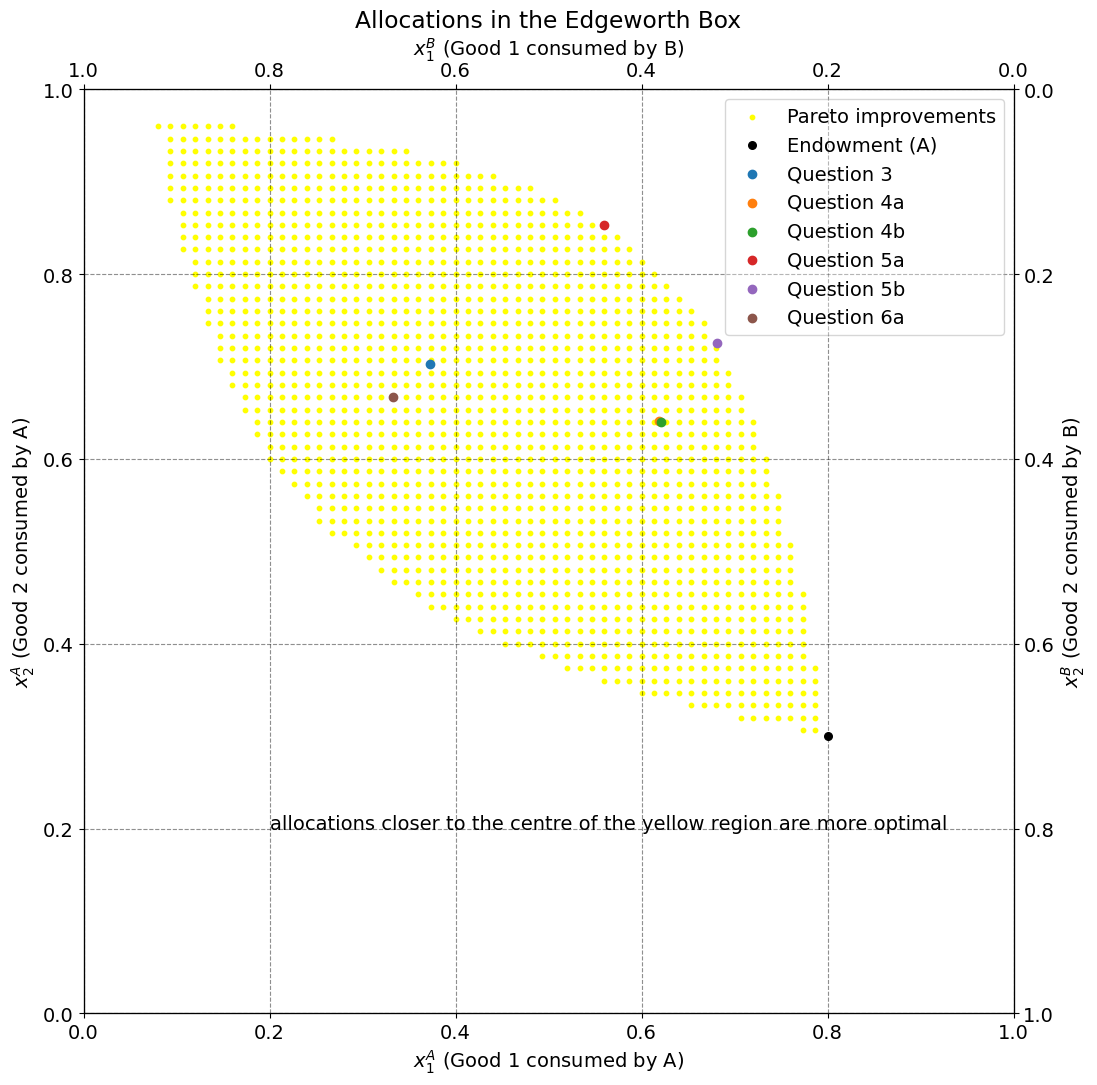

In [140]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters for the plot
N = 75
w1bar = w2bar = 1.0

# Setup the arrays for x1A and x2A based on the provided set C conditions
x1A_array = np.linspace(0, 1, N + 1)
x2A_array = np.linspace(0, 1, N + 1)
x1A_list = []
x2A_list = []

# Assuming 'model' is defined and has the 'utility_A' and 'utility_B' methods
# par should contain the endowment properties 'w1A' and 'w2A' for Consumer A

# Populate the lists with points that satisfy the utility conditions
for x1A in x1A_array:
    for x2A in x2A_array:
        x1B = w1bar - x1A
        x2B = w2bar - x2A
        if model.utility_A(x1A, x2A) >= model.utility_A(par.w1A, par.w2A) and \
           model.utility_B(x1B, x2B) >= model.utility_B(w1bar - par.w1A, w2bar - par.w2A):
            x1A_list.append(x1A)
            x2A_list.append(x2A)

# Define the allocations as per the second snippet provided
allocations = {
    'Question 3': (0.373, 0.703),
    'Question 4a': (0.619, 0.641),
    'Question 4b': (0.621, 0.64),
    'Question 5a': (0.56, 0.853),
    'Question 5b': (0.681, 0.725),
    'Question 6a': (0.333, 0.667)
}

# Create the plot
plt.figure(figsize=(12, 12))
ax = plt.subplot(1, 1, 1)

# Plot the Pareto improvements and endowment for Consumer A
ax.scatter(x1A_list, x2A_list, s=10, marker='o', color='yellow', label='Pareto improvements')
ax.scatter(par.w1A, par.w2A, s=30, marker='o', color='black', label='Endowment (A)')

# Plot the allocations specifically for Consumer A
for question, (x1A, x2A) in allocations.items():
    ax.scatter(x1A, x2A, label=question)

# Set labels and invert the axes for Consumer B
ax.set_xlabel("$x_1^A$ (Good 1 consumed by A)")
ax.set_ylabel("$x_2^A$ (Good 2 consumed by A)")

# Adding secondary axes for Consumer B with reversed direction
ax_top = ax.twiny()
ax_right = ax.twinx()
ax_top.set_xlabel("$x_1^B$ (Good 1 consumed by B)")
ax_right.set_ylabel("$x_2^B$ (Good 2 consumed by B)")
ax_top.set_xlim(1, 0)
ax_right.set_ylim(1, 0)

# Set limits
ax.set_xlim([0, w1bar])
ax.set_ylim([0, w2bar])
ax_top.set_xlim([w1bar, 0])  # Make sure the limits are correctly set after inverting axes
ax_right.set_ylim([w2bar, 0])  # Same for the right y-axis



# Add a legend and title
ax.legend(loc='upper right')
plt.title('Allocations in the Edgeworth Box')
plt.text(0.2,0.8,"allocations closer to the centre of the yellow region are more optimal")
plt.show()


# Question 7

We draw 50 elements from the set W
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>W</mi>
  <mo>=</mo>
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">{</mo>
    <mo stretchy="false">(</mo>
    <msubsup>
      <mi>&#x3C9;</mi>
      <mrow data-mjx-texclass="ORD">
        <mn>1</mn>
      </mrow>
      <mi>A</mi>
    </msubsup>
    <mo>,</mo>
    <msubsup>
      <mi>&#x3C9;</mi>
      <mrow data-mjx-texclass="ORD">
        <mn>2</mn>
      </mrow>
      <mi>A</mi>
    </msubsup>
    <mo stretchy="false">)</mo>
    <mo>&#x2223;</mo>
    <msubsup>
      <mi>&#x3C9;</mi>
      <mrow data-mjx-texclass="ORD">
        <mn>1</mn>
      </mrow>
      <mi>A</mi>
    </msubsup>
    <mo>&#x223C;</mo>
    <mi>U</mi>
    <mo stretchy="false">(</mo>
    <mn>0</mn>
    <mo>,</mo>
    <mn>1</mn>
    <mo stretchy="false">)</mo>
    <mo>,</mo>
    <msubsup>
      <mi>&#x3C9;</mi>
      <mrow data-mjx-texclass="ORD">
        <mn>2</mn>
      </mrow>
      <mi>A</mi>
    </msubsup>
    <mo>&#x223C;</mo>
    <mi>U</mi>
    <mo stretchy="false">(</mo>
    <mn>0</mn>
    <mo>,</mo>
    <mn>1</mn>
    <mo stretchy="false">)</mo>
    <mo data-mjx-texclass="CLOSE">}</mo>
  </mrow>
</math>

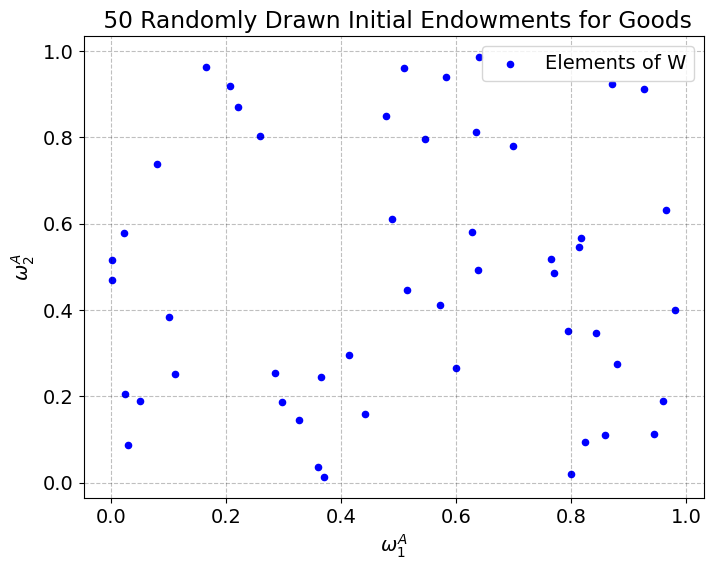

In [141]:
model = ExchangeEconomyClass()
W = model.draw_W()

# Plotting the elements
plt.figure(figsize=(8, 6))
plt.scatter(*zip(*W), c='blue', marker='o', s=20, label='Elements of W')
plt.title(' 50 Randomly Drawn Initial Endowments for Goods')
plt.xlabel('$\omega_1^A$')
plt.ylabel('$\omega_2^A$')
plt.grid(True)
plt.legend()
plt.show()

# Question 8

We look for prices that clear the market for each pair of starting supplies. We use minimize errors and find these prices. Then, using these prices, we figure out how much of each good everyone will choose to have. We show all this on a simple chart.

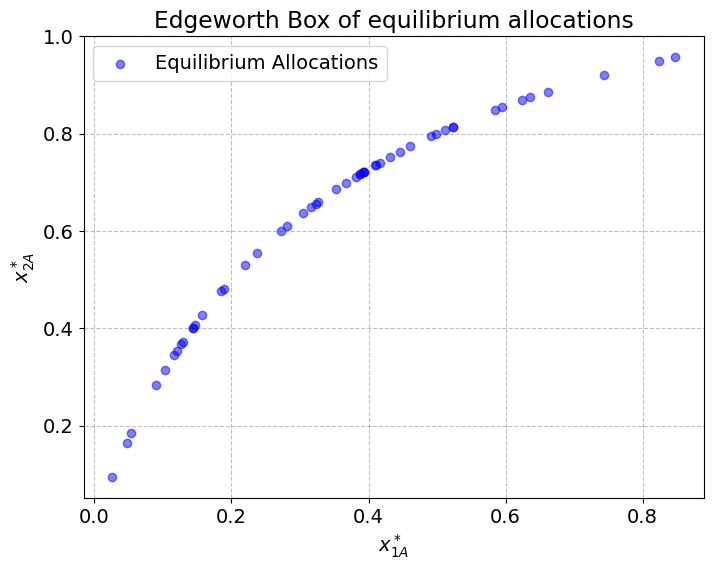

In [142]:
model.find_and_plot_equilibria()